# LAB3:Linear Regression

# Exercice1

In [47]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [7]:
dataset = pd.read_csv('grav.csv')


In [8]:
dataset.head(7)


,height,seconds squared
0,100,8.967
1,120,11.989
2,150,15.852
3,180,16.991
4,200,20.284
5,250,24.228
6,300,30.580


In [9]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   height           7 non-null      int64  
 1   seconds squared  7 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 240.0 bytes


In [10]:
dataset.describe()


,height,seconds squared
count,7.000000,7.000000
mean,185.714286,18.413000
std,71.147064,7.353301
min,100.000000,8.967000
25%,135.000000,13.920500
50%,180.000000,16.991000
75%,225.000000,22.256000
max,300.000000,30.580000


In [11]:
dataset.corr()

,height,seconds squared
height,1.000000,0.994732
seconds squared,0.994732,1.000000


In [12]:
dataset.columns

Index(['height', 'seconds squared'], dtype='object')

In [13]:
X = dataset[['seconds squared']]


In [14]:
y = dataset['height']


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [16]:
from sklearn.linear_model import LinearRegression


In [17]:
lm = LinearRegression()

In [18]:
lm.fit(X_train, y_train)

LinearRegression()

In [19]:
print(lm.intercept_)

10.449286722831943


In [20]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
seconds squared,9.496053


In [21]:
predictions = lm.predict(X_test)

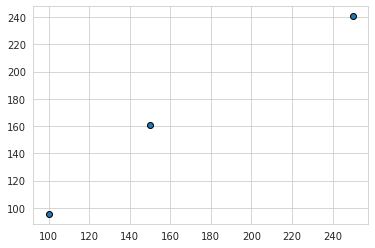

In [22]:
plt.scatter(y_test, predictions, edgecolor='black')

In [23]:
import pickle
pickle.dump(lm, open('model.pkl','wb'))

In [24]:
model = pickle.load(open('model.pkl','rb'))
print(model.predict([[8.967]]))

[95.60039368]


# Exercice2

In [1]:
!pip install pyreadstat

     |████████████████████████████████| 2.0 MB 1.3 MB/s eta 0:00:01


In [25]:
import pyreadstat
df, metadata = pyreadstat.read_sav("test_scores.sav")
df.head(10)

,school,school_setting,school_type,classroom,teaching_method,n_student,student_id,gender,lunch,pretest,posttest
0,ANKYI,1.0,2.0,6OL,0.0,20.0,2FHT3,1.0,2.0,62.0,72.0
1,ANKYI,1.0,2.0,6OL,0.0,20.0,3JIVH,1.0,2.0,66.0,79.0
2,ANKYI,1.0,2.0,6OL,0.0,20.0,3XOWE,0.0,2.0,64.0,76.0
3,ANKYI,1.0,2.0,6OL,0.0,20.0,556O0,1.0,2.0,61.0,77.0
4,ANKYI,1.0,2.0,6OL,0.0,20.0,74LOE,0.0,2.0,64.0,76.0
5,ANKYI,1.0,2.0,6OL,0.0,20.0,7YZO8,1.0,2.0,66.0,74.0
6,ANKYI,1.0,2.0,6OL,0.0,20.0,9KMZD,0.0,2.0,63.0,75.0
7,ANKYI,1.0,2.0,6OL,0.0,20.0,9USQK,1.0,2.0,63.0,72.0
8,ANKYI,1.0,2.0,6OL,0.0,20.0,CS5QP,0.0,2.0,64.0,77.0
9,ANKYI,1.0,2.0,6OL,0.0,20.0,D6HT8,1.0,2.0,61.0,72.0


In [26]:
# Shape of our dataset
df.shape

# Info our dataset
df.info()

# Describe our dataset
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2133 entries, 0 to 2132
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   school           2133 non-null   object 
 1   school_setting   2133 non-null   float64
 2   school_type      2133 non-null   float64
 3   classroom        2133 non-null   object 
 4   teaching_method  2133 non-null   float64
 5   n_student        2133 non-null   float64
 6   student_id       2133 non-null   object 
 7   gender           2133 non-null   float64
 8   lunch            2133 non-null   float64
 9   pretest          2133 non-null   float64
 10  posttest         2133 non-null   float64
dtypes: float64(8), object(3)
memory usage: 183.4+ KB


,school_setting,school_type,teaching_method,n_student,gender,lunch,pretest,posttest
count,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000,2133.000000
mean,1.814346,1.258322,0.356306,22.796531,0.495077,1.569620,54.955931,67.102203
std,0.793525,0.437814,0.479019,4.228893,0.500093,0.495245,13.563101,13.986789
min,1.000000,1.000000,0.000000,14.000000,0.000000,1.000000,22.000000,32.000000
25%,1.000000,1.000000,0.000000,20.000000,0.000000,1.000000,44.000000,56.000000
50%,2.000000,1.000000,0.000000,22.000000,0.000000,2.000000,56.000000,68.000000
75%,2.000000,2.000000,1.000000,27.000000,1.000000,2.000000,65.000000,77.000000
max,3.000000,2.000000,1.000000,31.000000,1.000000,2.000000,93.000000,100.000000


/home/sabrine/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


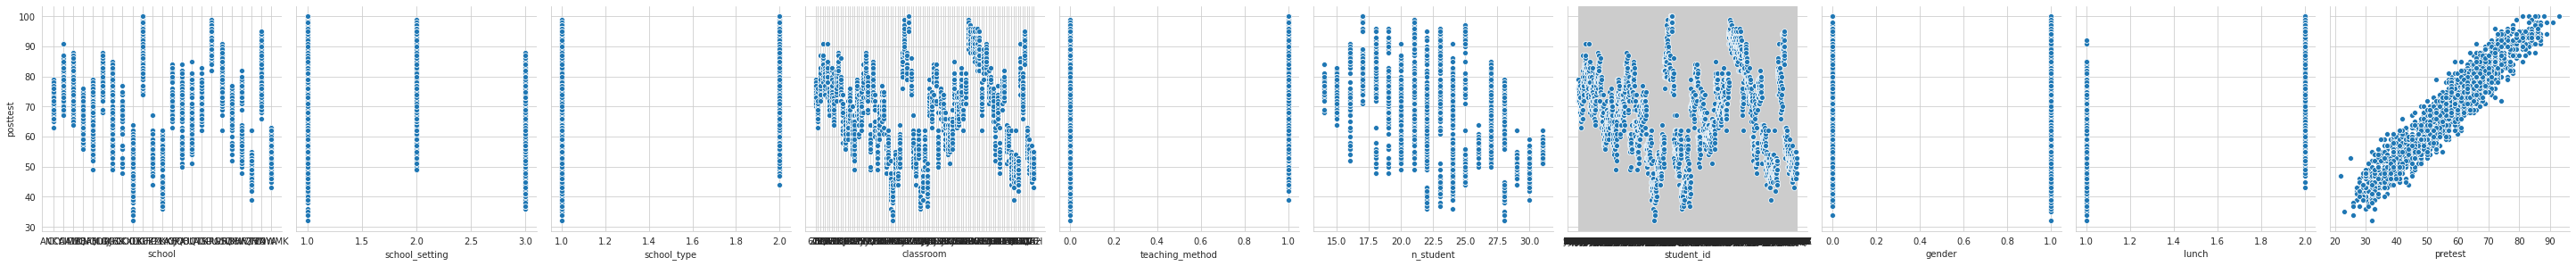

In [27]:
# Using pairplot we'll visualize the data for correlation
sns.pairplot(df, x_vars=['school','school_setting','school_type','classroom','teaching_method','n_student','student_id','gender', 'lunch','pretest'],y_vars='posttest', size=4, aspect=1, kind='scatter')
plt.show()

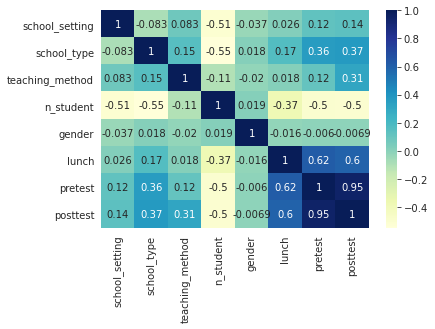

In [28]:
# Visualizing the data using heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

Text(0, 0.5, 'posttest')

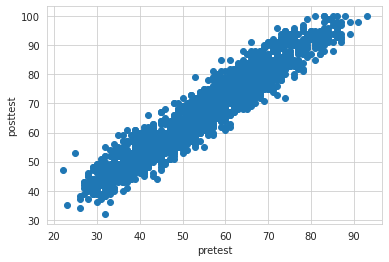

In [29]:
# Creating X and y
X = df['pretest']
y = df['posttest']
plt.scatter(X,y)
plt.xlabel("pretest")
plt.ylabel("posttest")

In [30]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [31]:
# Take a look at the train dataset
X_train
y_train

1455    81.0
299     67.0
1912    49.0
863     92.0
298     64.0
        ... 
350     57.0
1930    53.0
79      79.0
1859    47.0
1544    89.0
Name: posttest, Length: 1493, dtype: float64

In [32]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

In [33]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params

const      13.374988
pretest     0.978308
dtype: float64

In [34]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               posttest   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 1.429e+04
Date:                Wed, 02 Dec 2020   Prob (F-statistic):               0.00
Time:                        14:04:00   Log-Likelihood:                -4291.4
No. Observations:                1493   AIC:                             8587.
Df Residuals:                    1491   BIC:                             8597.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.3750      0.465     28.776      0.000      12.463      14.287
pretest        0.9783      0.008    119.525      0.000       0.962       0.994
==============================================================================
Omnibus:                       20.611   Durbin-Watson:                   2.063
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.131
Skew:                           0.167   Prob(JB):                     0.000314
Kurtosis:                       2.616   Cond. No.                         238.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

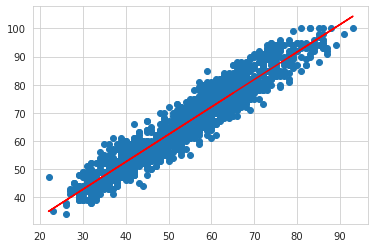

In [35]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 13.3750 + 0.9783*X_train, 'r')
plt.show()

In [36]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)

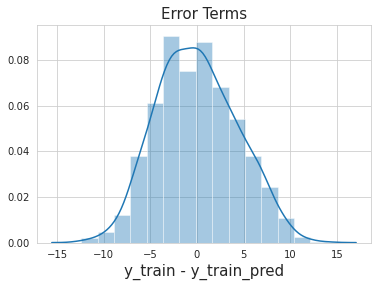

In [37]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

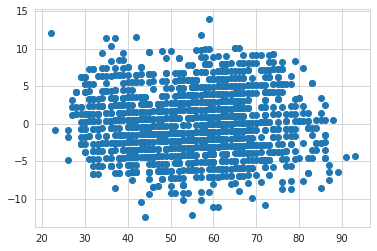

In [38]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()

In [39]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred

686     58.377169
1836    58.377169
1587    88.704726
63      78.921643
1348    71.095177
          ...    
146     76.965027
374     51.529011
1989    75.986718
581     53.485628
272     64.247019
Length: 640, dtype: float64

In [40]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared

0.9009451419275621

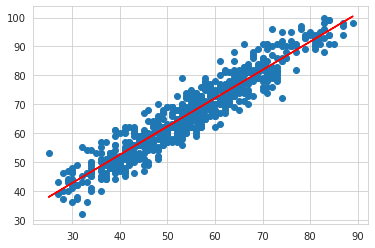

In [41]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()

In [42]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, 
                                                                test_size = 0.3, random_state = 100)

In [43]:
# Shape of the train set without adding column
X_train_lm.shape

# Adding additional column to the train and test data
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

print(X_train_lm.shape)
print(X_test_lm.shape)

(1493, 1)
(640, 1)


In [44]:
from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression
lm = LinearRegression()

# Fit the model using .fit() method
lm.fit(X_train_lm, y_train_lm)

LinearRegression()

In [45]:
# Intercept value
print("Intercept :",lm.intercept_)

# Slope value
print('Slope :',lm.coef_)

Intercept : 13.374988195767308
Slope : [0.97830828]


In [46]:
# Making Predictions of y_value
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

# Comparing the r2 value of both train and test data
print(r2_score(y_train,y_train_pred))
print(r2_score(y_test,y_test_pred))

0.9054961340673476
0.900945141927562


# Exercice3 Linear Regression on Boston Housing Dataset

# Import the data

In [48]:
dataset = pd.read_csv('housing.data.txt')

# checking dataset TXT

In [49]:
dataset.head(7)

,CIRM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9


# Data preprocessing

In [50]:
# check for missing values in all the columns
dataset.isnull().sum()

CIRM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

# checking columns and total records


In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CIRM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


# dataset description

In [52]:
dataset.describe()

,CIRM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,1.716290,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,2.653510,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.250895,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,2.326718,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,9.966540,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Exploring types of relationship across the entire dataset

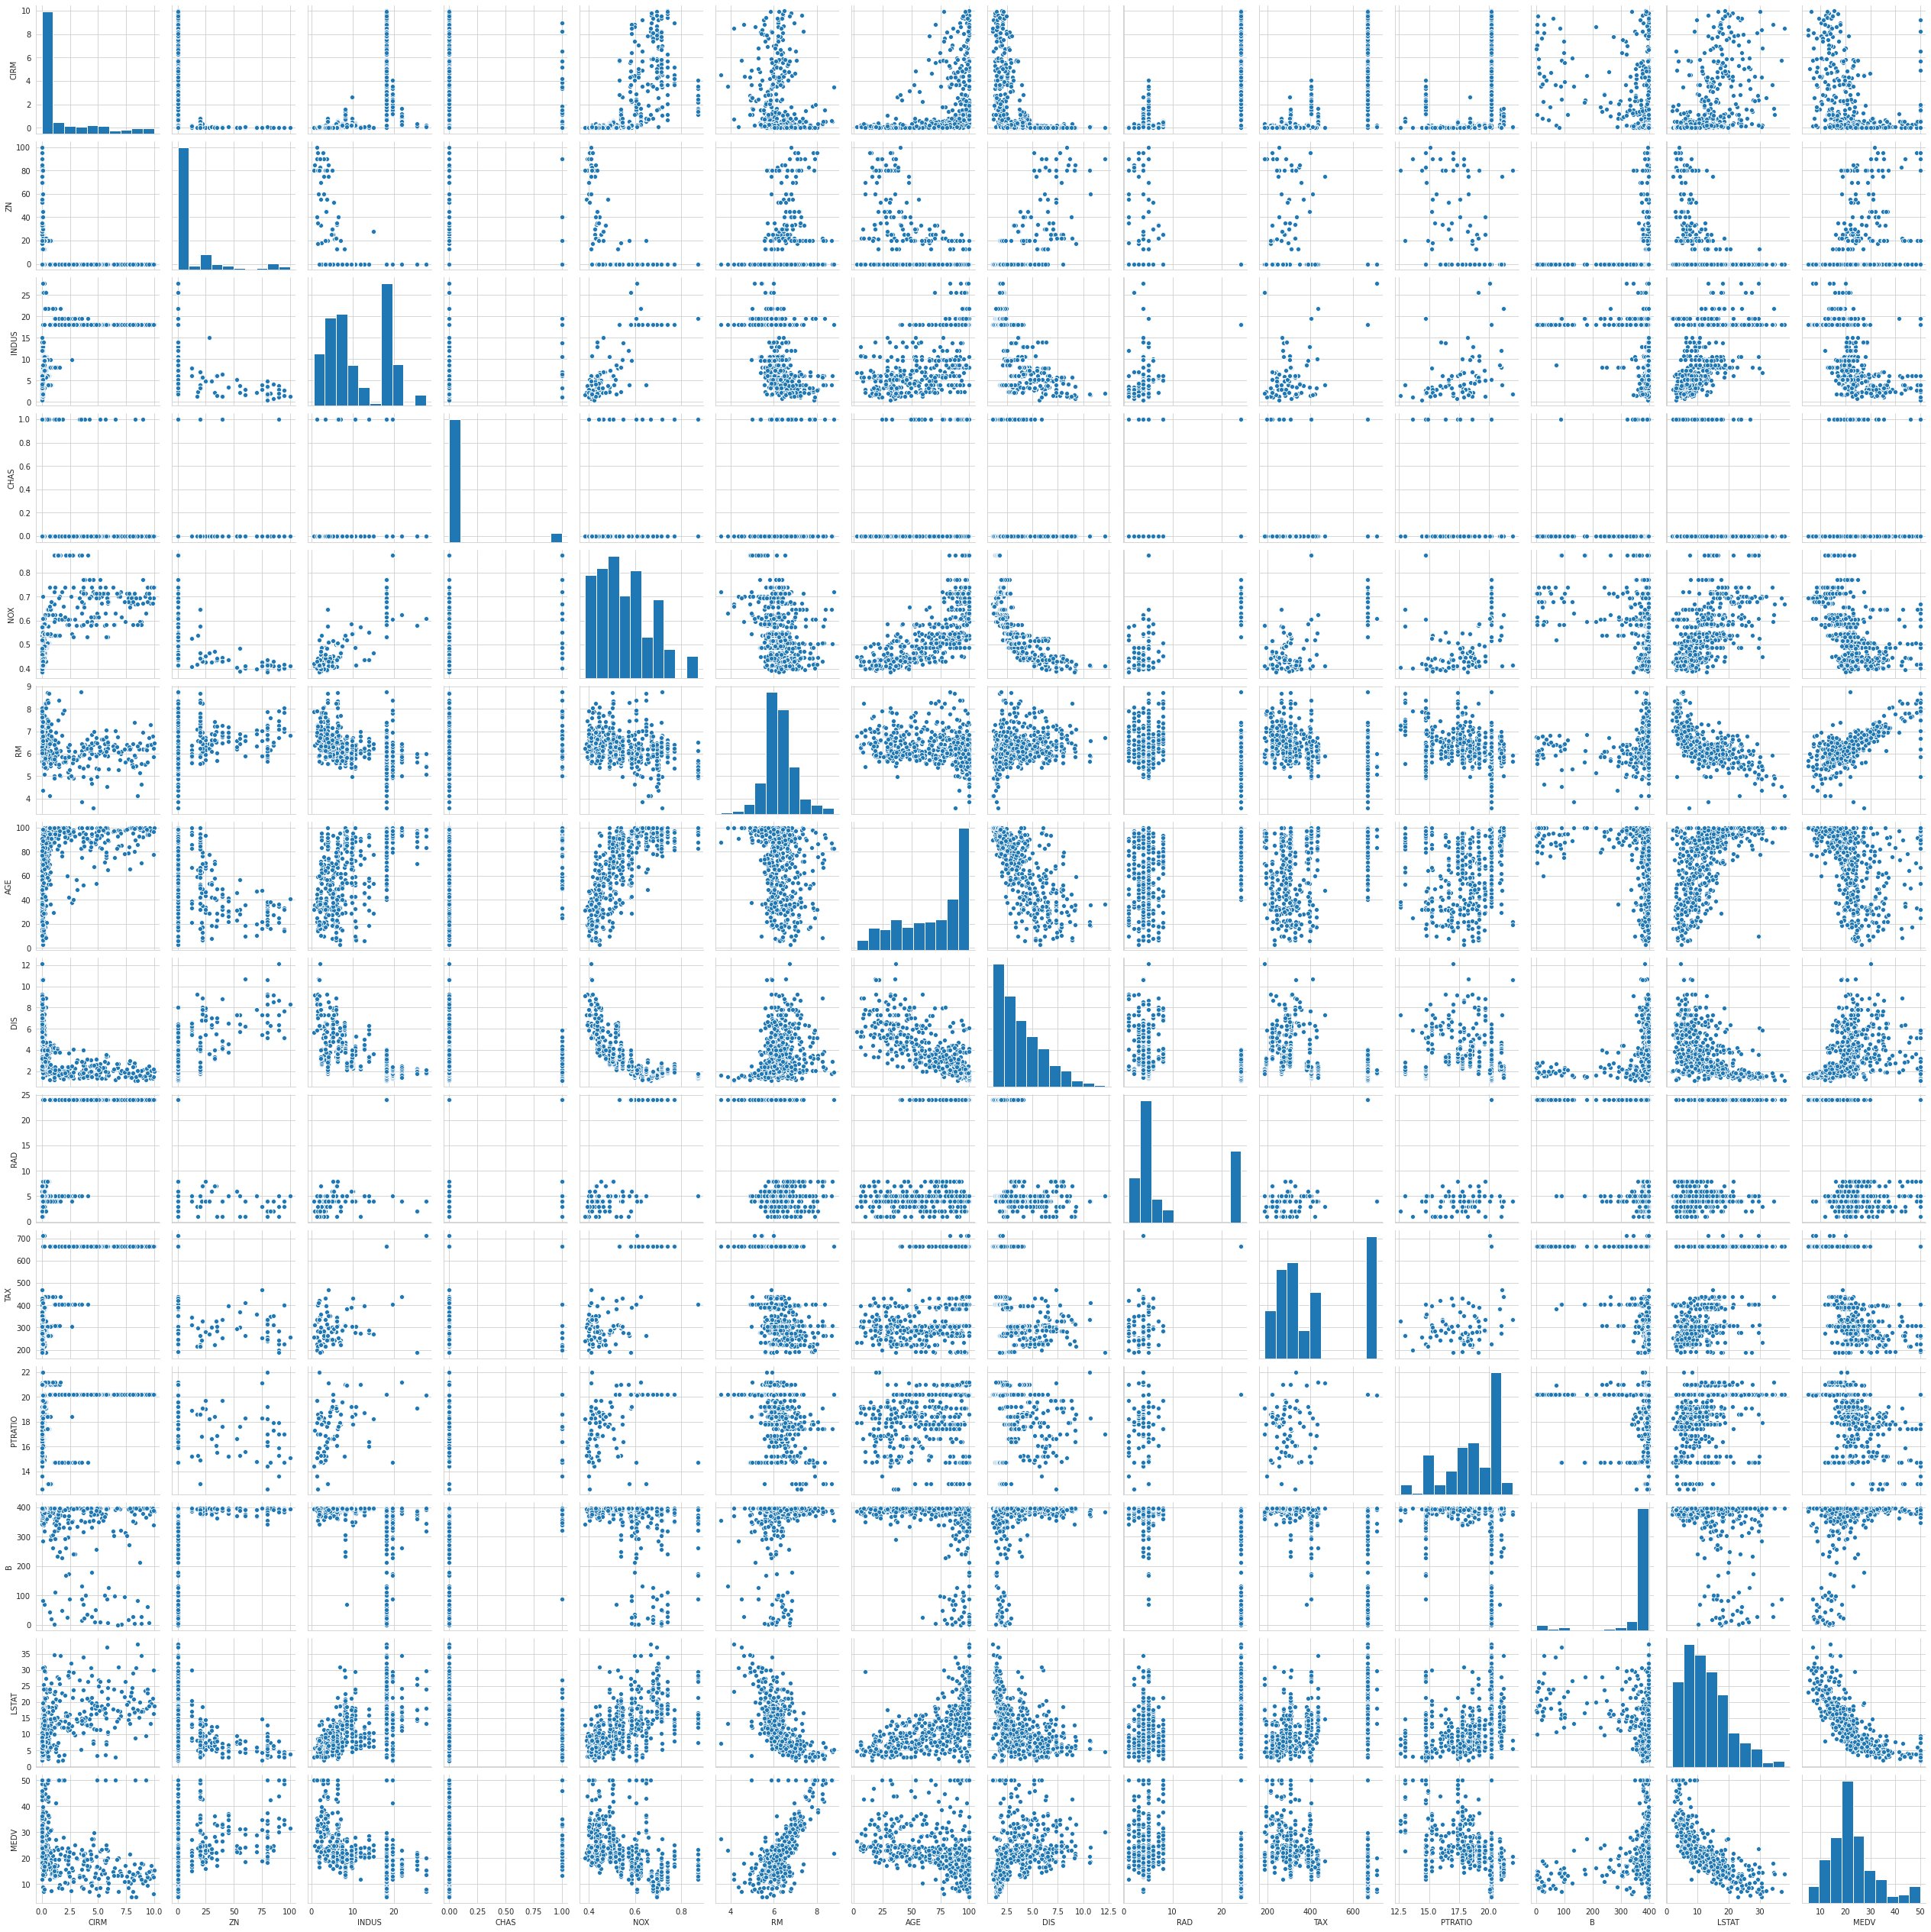

In [53]:
sns.pairplot(dataset)

# Data Visualization (Target "MEDV" information)

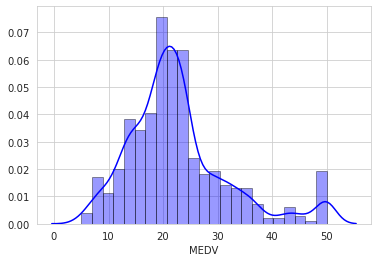

In [54]:
sns.distplot(dataset['MEDV'],hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Displaying correlation among all the columns


In [55]:
dataset.corr()

,CIRM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CIRM,1.000000,-0.300774,0.590822,0.013922,0.634679,-0.190197,0.482013,-0.499501,0.838671,0.793392,0.362615,-0.377013,0.481907,-0.362077
ZN,-0.300774,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.590822,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,0.013922,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.634679,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.190197,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.482013,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.499501,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.838671,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.793392,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


# Displaying correlation among all the columns using Heat Map


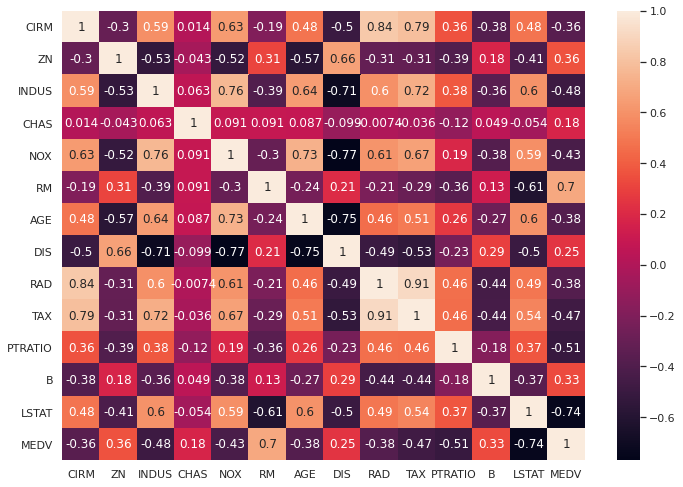

In [56]:
correlation_matrix = dataset.corr().round(2)
sns.heatmap(dataset.corr(), annot = True)

# Getting all Coulmn names

In [57]:
dataset.columns

Index(['CIRM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

# Columns as Features

In [58]:
X = dataset[['CIRM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]

# MEDV is my Target Variable, what we trying to predict

In [59]:
y = dataset['MEDV']

# Training the Model (Train=70% test=30%)


In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)



# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
#X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 13)
(152, 13)
(354,)
(152,)


 # importing the Linear Regression Algorithm

In [61]:
from sklearn.linear_model import LinearRegression

# creating LinearRegression Object

In [62]:
lm = LinearRegression()

# Training the Data Model

In [63]:
lm.fit(X_train, y_train)

LinearRegression()

# Displaying the Intercept

In [64]:
print(lm.intercept_)

39.01790946276154


# coefficient of variation

In [65]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
CIRM,-0.159131
ZN,0.047686
INDUS,0.029984
CHAS,3.843581
NOX,-16.855328
RM,3.290709
AGE,0.012905
DIS,-1.350760
RAD,0.254144
TAX,-0.010210


# What is the value of R2 and the adjusted R2 ?

In [66]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [67]:
# model evaluation for training set

y_train_predict = lm.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
r2 = r2_score(y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# model evaluation for testing set

y_test_predict = lm.predict(X_test)
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))

# r-squared score of the model
r2 = r2_score(y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 4.441262494910576
R2 score is 0.7438945812751192


The model performance for testing set
--------------------------------------
RMSE is 5.436725099465169
R2 score is 0.7022170774540724


# Predictions from our Model

In [68]:
predictions = lm.predict(X_test)
print(predictions)

[40.05434935 27.58532598 17.080321   16.37195117 31.04340682 32.09340192
 38.66488432  7.68651742 33.65669838 10.26358275 30.36559129 13.3796651
 16.11952666 17.47802597 25.14399065 21.09810092  8.14070077 33.06159582
 28.39063791 24.69477378 11.60059369 20.16779752 22.63561983 24.69529147
 33.85419103 18.41414648 32.39372578 18.77097529 26.85632194 34.41157701
 19.91763483 18.38849483 37.11676956 44.96304473 30.08186966 21.97873821
 15.42584256 18.12150799  4.34091266 30.9685075  24.0243697  17.30529316
 34.20448864 13.13271596 17.17322394 25.40950457 30.44135865 16.09819561
 26.95677395 23.21597438 32.27038697 37.46808369 22.80132018 21.62089752
 30.4153115  -0.28103972 20.06595506 16.61104741 23.10286623 20.9606356
 30.5485657   2.67054723 15.60539749 19.92286179 10.4146272  24.33604201
 24.02995355 19.79990378 17.92715807 19.44280236 23.8237952  21.36940288
 23.66289705 20.15885674 27.24170041 21.72582066 37.04698898  7.78545867
 28.87670452 17.55990929 15.45301683 18.88150214 30.1

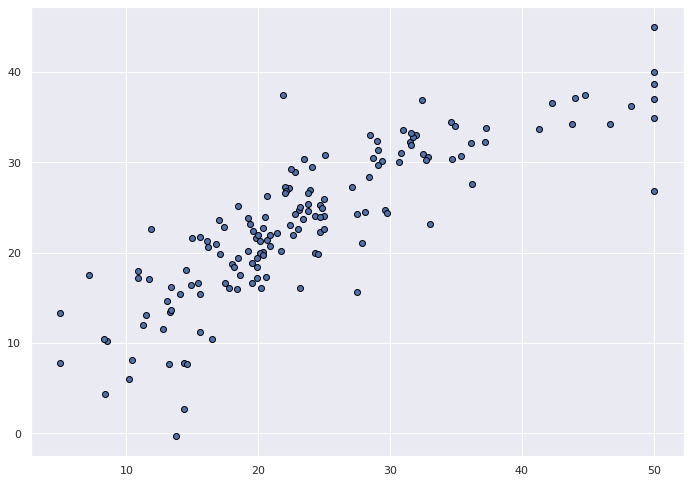

In [69]:
# plotting the y_test vs y_pred
# ideally should have been a straight line
plt.scatter(y_test, predictions, edgecolor ='black')
plt.show()
